In [3]:
# !pip install darts
# !pip install -U kaleido

## **Step 1: Import all the libraries and modules**

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import glob as gb


%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
target_dir = os.path.abspath(os.path.join(os.getcwd(), '..' ))
sys.path.append(target_dir)
from darts.models import RNNModel
    
from Models.RNNLSTMModel.preprocessing import split_train_valid_test
from Models.RNNLSTMModel.preprocessing import transformed_ts
from Models.RNNLSTMModel.RNNLSTMMODEL import RNNLSTMModel
from Models.RNNLSTMModel.evaluation import evaluation_of_model_RnnLstm_Model    

from Models.ARIMAModel.preprocessing import preprocess_df_to_ts

from sklearn.model_selection import  train_test_split
import logging
import gc

import sys
import warnings
warnings.filterwarnings("ignore")
logging.disable(logging.CRITICAL)

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/ubuntu/.local/lib/python3.10/site-packages/statsforecast/core.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## **Step 2 : Reading Data Daily Traffic Accident Forecasting**

In [5]:
daily_traffic_accident_data_path = '../data/processed/daily_data.csv'
daily_accident_df = pd.read_csv(daily_traffic_accident_data_path)
daily_accident_df

,daily,daily_accident
0,2018-01-01,234
1,2018-01-02,408
2,2018-01-03,231
3,2018-01-04,225
4,2018-01-05,342
...,...,...
1821,2022-12-27,183
1822,2022-12-28,177
1823,2022-12-29,191
1824,2022-12-30,193


## **Step 3 : Split the Data into train and test data**

In [6]:
processed_train_df, processed_test_df = train_test_split(
        daily_accident_df, test_size=0.245, random_state=42, shuffle=False)

## **Step 4 : Preprocess the data into Time series object**

In [7]:
print('[INFO] Converting data into times series types')
ts_train = preprocess_df_to_ts(processed_train_df,'daily','daily_accident','1D')
ts_test = preprocess_df_to_ts(processed_test_df,'daily','daily_accident','1D')

[INFO] Converting data into times series types


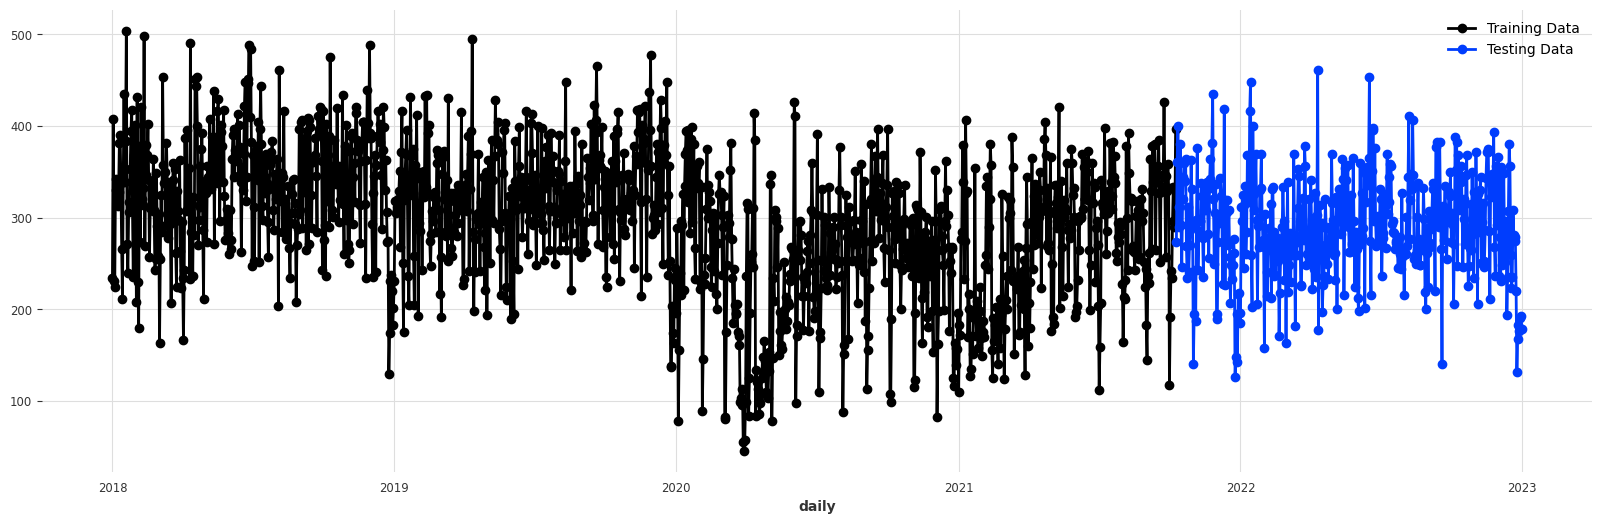

In [8]:
plt.figure(figsize=(20,6))
ts_train.plot(marker='o',label='Training Data')
ts_test.plot(marker='o',label='Testing Data')
plt.show()

## **Step 5 : Split the data into train and validation**

In [9]:
train_subset, val_subset = split_train_valid_test(ts_train, split_point=0.9)

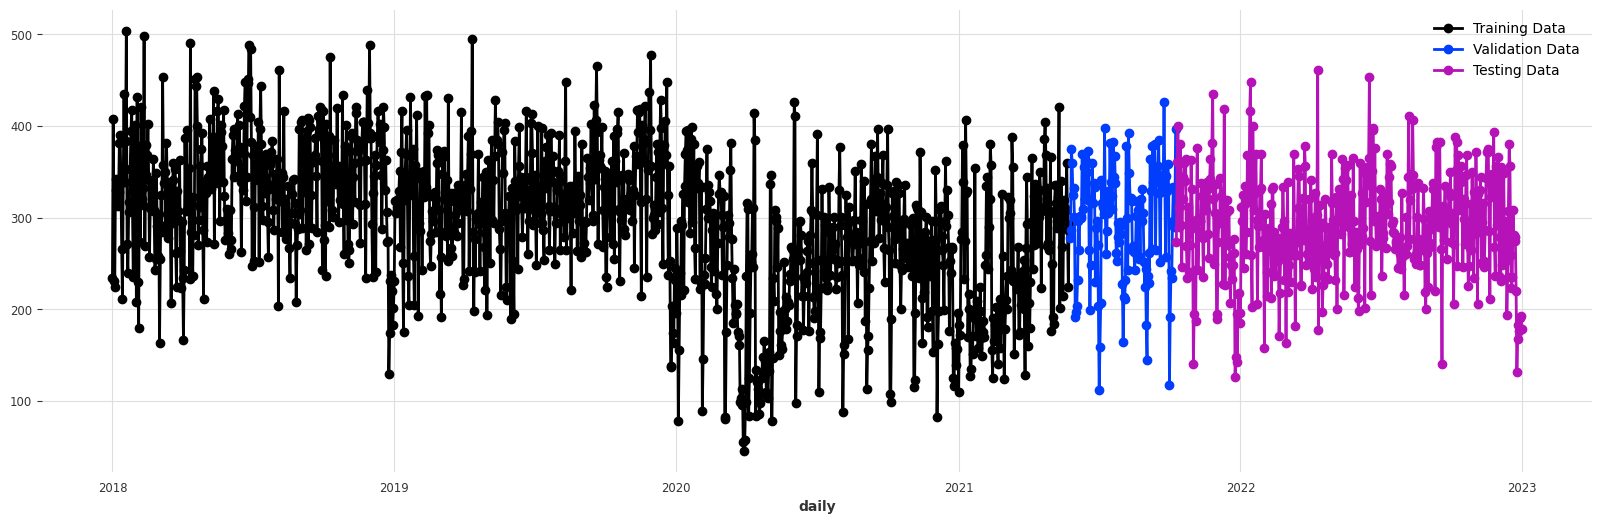

In [10]:
plt.figure(figsize=(20,6))
train_subset.plot(marker='o',label='Training Data')
val_subset.plot(marker='o',label='Validation Data')

ts_test.plot(marker='o',label='Testing Data')
plt.show()

## **Step 6 : Scale & Normalize the data before fitting the RNN_LSTM Model**

In [11]:
print('[INFO] Preprocessing Data for RNN-LSTM Model')
(
transformer_object,
train_ts_transformed,
val_ts_transformed,
series_ts_transformed,  
) = transformed_ts(ts_train, 
                val_subset, 
                train_subset, 
            train_data_status=True)

[INFO] Preprocessing Data for RNN-LSTM Model


## **Step 7 : Training RNNLSTM Model**

In [ ]:
list_of_trained_best_models = os.listdir(f"{os.path.join('darts_logs')}/")


model="LSTM"
hidden_dim = 30
n_rnn_layers = 50
dropout = 0
batch_size = 32
n_epochs = 100
learning_rate=0.0001
log_tensorboard=True
random_state=42
training_length=60
input_chunk_length=60
force_reset=True
save_checkpoints=True

trained_model_file_name = f"model_{model}_hidden_dim_{hidden_dim}_n_rnn_layers_{n_rnn_layers}_dropout_{dropout}_batch_size_{batch_size}_n_epochs_{n_epochs}_learning_rate_{learning_rate}_log_tensorboard_{log_tensorboard}_training_length_{training_length}_input_chunk_length_{input_chunk_length}"



model_name=trained_model_file_name

if trained_model_file_name in list_of_trained_best_models:
    print('Loading the pre-trained Model')
    # rnn_lstm_model = RNNModel.load(trained_model_file_name)
    rnn_lstm_model = RNNModel.load_from_checkpoint(trained_model_file_name)


else:
    print('Training the Models')
    rnn_lstm_model = RNNLSTMModel(
                    train_ts_transformed = train_ts_transformed,
                    val_ts_transformed = val_ts_transformed,
                    model=model,
                    hidden_dim=hidden_dim,
                    n_rnn_layers=n_rnn_layers,
                    dropout=dropout,
                    batch_size=batch_size,
                    n_epochs=n_epochs,
                    learning_rate=learning_rate,
                    model_name=model_name,
                    log_tensorboard=True,
                    random_state=42,
                    training_length=training_length,
                    input_chunk_length=training_length,
                    force_reset=True,
                    save_checkpoints=True)
                
                    
    # rnn_lstm_model.save(trained_model_file_name)



Training the Models


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

## **Step 8 : Evaluation of the RNNLSTM Model**

[INFO] Evaluation of RNN-LSTM Model
window_size :60
Evaluation of input window : 60 & Horizon : 388


Predicting: |          | 0/? [00:00<?, ?it/s]

metrics: {'MAE': 43.49, 'RMSE': 55.6, 'MAPE': 16.95, 'MSE': 3091.41}


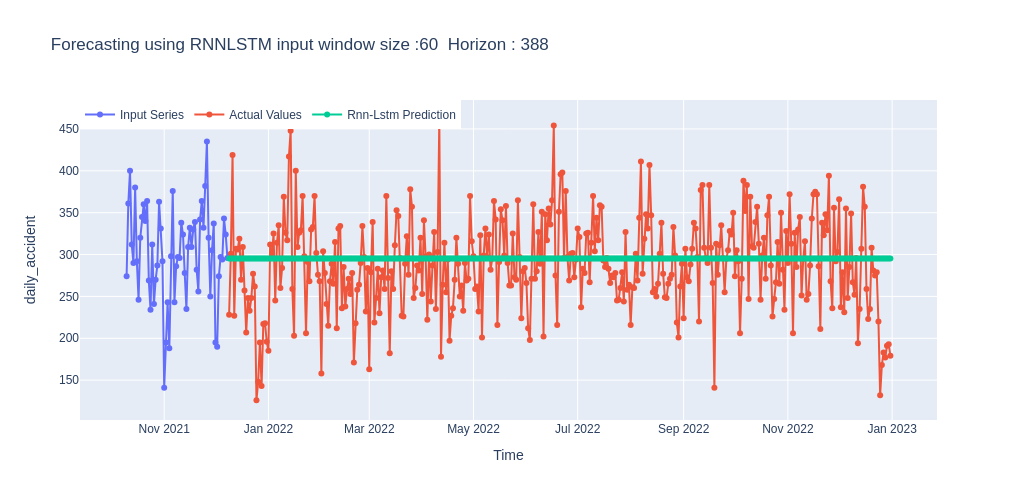

window_size :120
Evaluation of input window : 120 & Horizon : 328


Predicting: |          | 0/? [00:00<?, ?it/s]

metrics: {'MAE': 41.52, 'RMSE': 52.63, 'MAPE': 15.73, 'MSE': 2769.77}


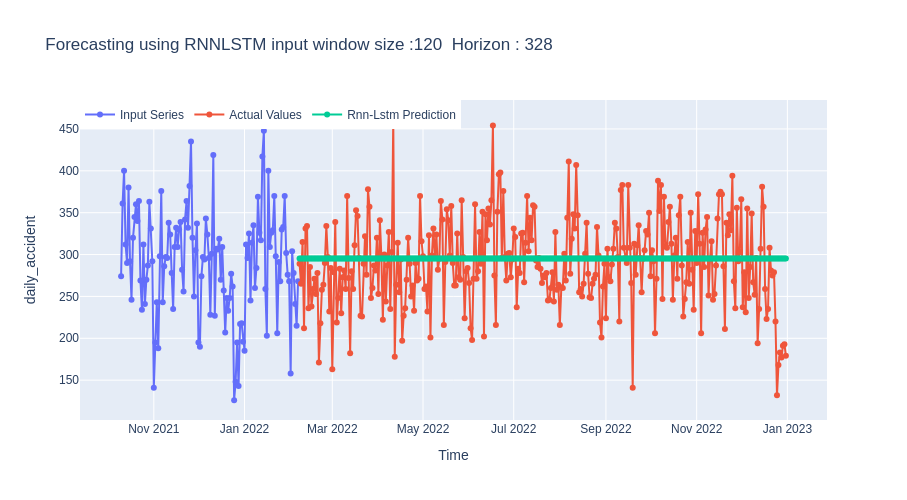

window_size :180
Evaluation of input window : 180 & Horizon : 268


Predicting: |          | 0/? [00:00<?, ?it/s]

metrics: {'MAE': 41.87, 'RMSE': 53.21, 'MAPE': 15.61, 'MSE': 2831.16}


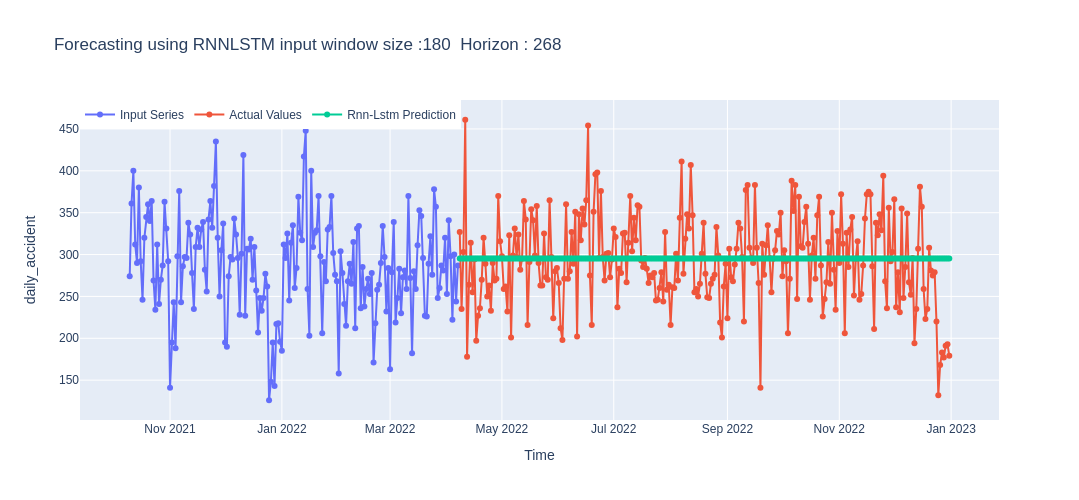

window_size :240
Evaluation of input window : 240 & Horizon : 208


Predicting: |          | 0/? [00:00<?, ?it/s]

metrics: {'MAE': 42.42, 'RMSE': 53.63, 'MAPE': 15.75, 'MSE': 2876.7}


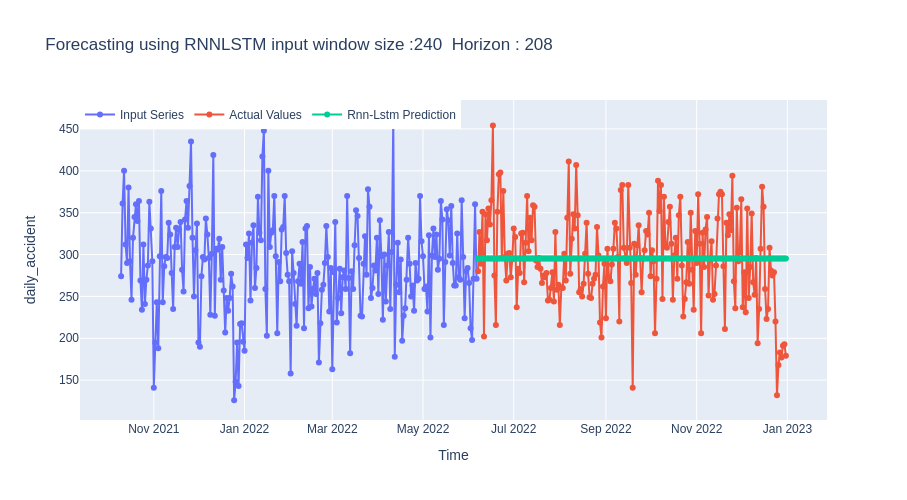

window_size :300
Evaluation of input window : 300 & Horizon : 148


Predicting: |          | 0/? [00:00<?, ?it/s]

metrics: {'MAE': 44.45, 'RMSE': 55.69, 'MAPE': 17.11, 'MSE': 3101.89}


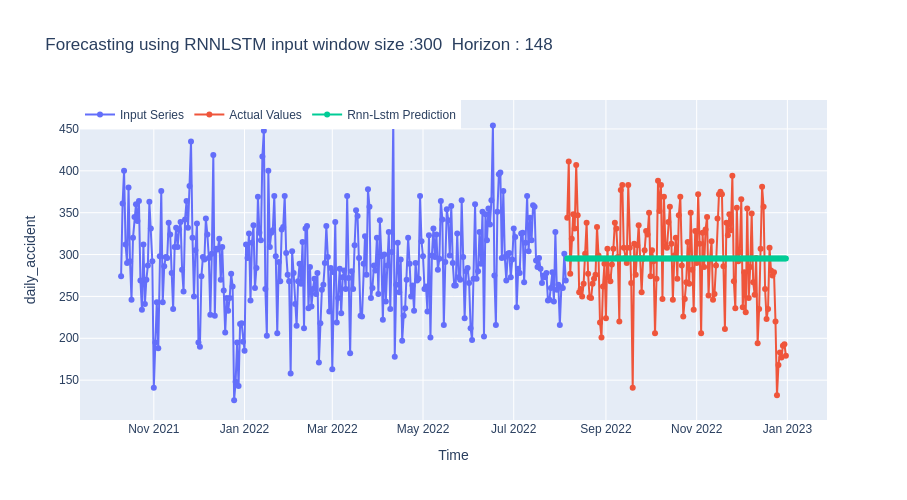

598

In [28]:
print('[INFO] Evaluation of RNN-LSTM Model')
# Example usage
transformer_ob = transformer_object  # Assuming this is defined elsewhere
evaluation_rnn_lstm_df = evaluation_of_model_RnnLstm_Model(model_name,
                                                transformer_ob=transformer_ob,
                                                ts_test=ts_test,
                                                ts_train=ts_train)
gc.collect()


## **Step 9 : Saving the Statistical Results**

In [ ]:
print('[INFO] Generating Statistical Results of RNN-LSTM Model')
statistical_result_save_path = os.path.join("../StatisticalResults")
os.makedirs(statistical_result_save_path,exist_ok=True)

evaluation_rnn_lstm_df.to_csv(
f"{statistical_result_save_path}/rnn_lstm_evaluation_results.csv", index=False
)

In [19]:
evaluation_rnn_lstm_df

,input_window_in_hours,output_window_in_hours,MAE,RMSE,MAPE,MSE
0,60,388,52.80,65.59,21.65,4302.18
1,120,328,48.92,60.58,19.53,3669.84
2,180,268,48.77,60.63,19.27,3676.41
3,240,208,49.16,61.52,19.32,3784.61
4,300,148,49.38,63.19,20.04,3993.29
